In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
import glob
from scipy.stats.mstats import linregress
import numpy as np

In [2]:
files=sorted(glob.glob('CERES_FluxByCldTyp_*.nc'))
DS=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [3]:
lat=DS.lat
lon=DS.lon
time=DS.time

In [4]:
wt = np.cos(np.tile(abs(lat.values[:,None])*np.pi/180,(1,len(lon))))
Ds=DS*wt
Ds=Ds.fillna(0)

In [5]:
cirrus=Ds.cldarea_cldtyp_mon[0:2,4:,:,:,:].sum('opt').sum('press')
cirro=Ds.cldarea_cldtyp_mon[2:4,4:,:,:,:].sum('opt').sum('press')
deep=Ds.cldarea_cldtyp_mon[4:,4:,:,:,:].sum('opt').sum('press')
strcum=Ds.cldarea_cldtyp_mon[2:4,0:2,:,:,:].sum('opt').sum('press')

In [6]:
def take_anom(arg):
    anom=(arg.groupby('time.month'))-(arg.groupby('time.month').mean('time'))
    return(anom)

In [7]:
cirrus_a=take_anom(cirrus)
cirro_a=take_anom(cirro)
deep_a=take_anom(deep)
strcum_a=take_anom(strcum)


In [8]:
ci1=cirrus_a[3:7,:,:].mean('time')
ci2=cirrus_a[15:19,:,:].mean('time')
ci3=cirrus_a[27:31,:,:].mean('time')
ci4=cirrus_a[39:43,:,:].mean('time')
ci5=cirrus_a[51:55,:,:].mean('time')
ci6=cirrus_a[63:67,:,:].mean('time')
ci7=cirrus_a[75:79,:,:].mean('time')
ci8=cirrus_a[87:91,:,:].mean('time')
ci9=cirrus_a[99:103,:,:].mean('time')
ci10=cirrus_a[111:115,:,:].mean('time')
ci11=cirrus_a[123:127,:,:].mean('time')
ci12=cirrus_a[135:139,:,:].mean('time')
ci13=cirrus_a[147:151,:,:].mean('time')
ci14=cirrus_a[159:163,:,:].mean('time')
ci15=cirrus_a[171:175,:,:].mean('time')
ci16=cirrus_a[183:187,:,:].mean('time')
ci17=cirrus_a[195:199,:,:].mean('time')
ci18=cirrus_a[207:210,:,:].mean('time')

In [9]:
cf1=xr.concat([ci1,ci2,ci3,ci4,ci5,ci6,ci7,ci8,ci9,ci10,ci11,ci12,ci13,ci14,ci15,ci16,ci17,ci18],dim='time')

In [10]:
sst_dss=xr.open_dataset('sst.mnmean.nc')
sst_ds=sst_dss.sel(time=slice('2002-07-01','2019-12-01'))
sst=sst_ds.sst*wt
SST=take_anom(sst)

In [11]:
s1=SST[3:7,:,:].mean('time')
s2=SST[15:19,:,:].mean('time')
s3=SST[27:31,:,:].mean('time')
s4=SST[39:43,:,:].mean('time')
s5=SST[51:55,:,:].mean('time')
s6=SST[63:67,:,:].mean('time')
s7=SST[75:79,:,:].mean('time')
s8=SST[87:91,:,:].mean('time')
s9=SST[99:103,:,:].mean('time')
s10=SST[111:115,:,:].mean('time')
s11=SST[123:127,:,:].mean('time')
s12=SST[135:139,:,:].mean('time')
s13=SST[147:151,:,:].mean('time')
s14=SST[159:163,:,:].mean('time')
s15=SST[171:175,:,:].mean('time')
s16=SST[183:187,:,:].mean('time')
s17=SST[195:199,:,:].mean('time')
s18=SST[207:210,:,:].mean('time')

In [12]:
S=xr.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18],dim='time')

In [13]:
y1=S[:,60:120,:].mean('lat').mean('lon')

In [14]:
def linear_regression(x):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y1)
    return [slope,intercept,rvalue,pvalue,stderr]

In [15]:
reg_cf1 = np.apply_along_axis(linear_regression, 0, cf1)

/home/z5241410/miniconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/z5241410/miniconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [16]:
slope_cf1=xr.DataArray(data=reg_cf1[0,:,:],coords=[lat,lon],dims=['lat','lon'])
intercept_cf1=xr.DataArray(data=reg_cf1[1,:,:],coords=[lat,lon],dims=['lat','lon'])
rvalue_cf1=xr.DataArray(data=reg_cf1[2,:,:],coords=[lat,lon],dims=['lat','lon'])
pvalue_cf1=xr.DataArray(data=reg_cf1[3,:,:],coords=[lat,lon],dims=['lat','lon'])
stderr_cf1=xr.DataArray(data=reg_cf1[4,:,:],coords=[lat,lon],dims=['lat','lon'])


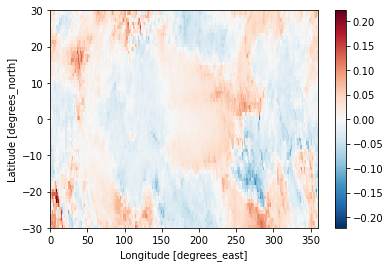

In [17]:
slope_cf1[60:120,:].plot()

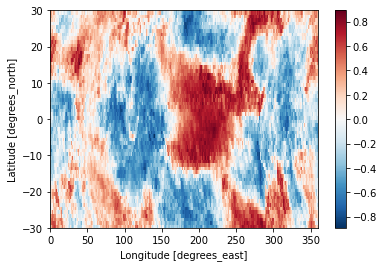

In [18]:
rvalue_cf1[60:120,:].plot()

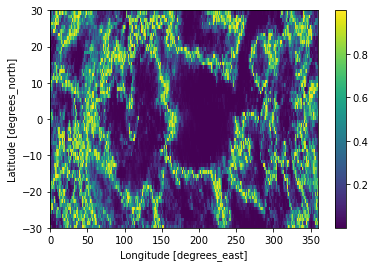

In [19]:
pvalue_cf1[60:120,:].plot()

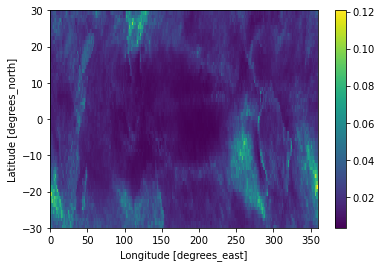

In [20]:
stderr_cf1[60:120,:].plot()